# How to Clean Up Your Data
## Example: Where to look for Meteorites in the USA

So you have some fresh data, which you are sure contains useful insights. But now what?

While every dataset will need its own specific cleaning steps, we follow a general procedure, no matter the data we are cleaning. I will use as an example the Meteorite Landings dataset provided by the Meteorical Society, accessible at the NASA Open Data Portal (this webpage) [https://data.nasa.gov/Space-Science/Meteorite-Landings/ak9y-cwf9]. I will data clean using Python 3.9 in Microsoft Visual Studio Code. 

In any data cleaning exercise, we follow these steps:

### Step 1: Define your initial goal.

Carefully define what you want from the data. You may revise it, but at first, think about what you want to accomplish. 

For the Meteorite Landings data, we want to find where we can most readily find meteorites in the continental USA. 

### Step 2: Summarize your Dataset

This basic step involves doing very basic perusals of your data. How many data entries does the data contain? How many data fields? What does each data field contain? 

Pandas is our favorite library for answering these basic questions, because of its ease of use and many handy methods for data exploration. If you haven't already, create a virtual environment in your project directory, activate it, and then install pandas.

* python 3.9 -m venv .venv *(Create a Virtual Environment in your current directory)*
* .venv\Scripts\Activate.ps1 *(activate it in your PowerShell terminal)*
* pip install pandas *(install pandas!)*

Now open your data and inspect it using. I'll do this for Meteorite Landings as an example. This data is in CSV, handy to read using pandas -- pandas will read the CSV and convert into a tabular dataframe. I will inspect the summary information of this dataframe and then inspect a sample using two handy dataframe methods - sample(), and the atttribute .style.

In [211]:
import pandas as pd

meteorite_data = pd.read_csv('example-datasets/Meteorite_Landings.csv')

meteorite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
 10  States       1659 non-null   float64
 11  Counties     1659 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 4.2+ MB


The dataset is 4.2 MB in size, with 11 fields composed of a mix of strings and float values. 

#### Data Summary
Summarizing this work, we can see that this dataset contains a list of known meteorites which have struck the earth, along with their latitude, longitude, mass, and year of observation. 

### Step 3: Data Dictionary Review and Key Variable identification
**Goal** Understand all of the data in your dataset, and identify key variables that you will use in your analysis, and which you *might* use in your analysis. 

Now, review the fields, line by line, as they appear in the dataset. Also peruse the available documentation, to help understand each field. Once you have done that, give a line-by-line summary of what each data field describes and the data it contains. 

It's always important to review the "real" data when you do this, rather than just field names. So let's look at a random sample of 5 data points.

In [212]:
meteorite_data.sample(5).style

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties
44481,Yamato 982193,38815,Valid,H4,5.730000,Found,1998.000000,0.000000,0.000000,"(0.0, 0.0)",nan,nan
27594,Northwest Africa 2560,33081,Valid,H4,549.000000,Found,2004.000000,0.000000,0.000000,"(0.0, 0.0)",nan,nan
39368,Yamato 75277,25318,Valid,H6,99.000000,Found,1975.000000,-71.500000,35.666670,"(-71.5, 35.66667)",nan,nan
4891,Asuka 882018,4727,Valid,L,60.660000,Found,1988.000000,-72.000000,26.000000,"(-72.0, 26.0)",nan,nan
15098,Grove Mountains 051863,48240,Valid,L6,882.000000,Found,2006.000000,-72.775556,75.334167,"(-72.775556, 75.334167)",nan,nan


Here is a short summary of the fields, based on what we can observe, and from what the (very limited) documentation provides:

1) **name** is just a verbal description. This won't be much use in any analysis.
2) **id** appears to be a unique number for each field - pretty handy.
3) **nametype** it is not clear what this means, but if you look at the (webpage) [https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh] it says "Under NameType, 'valid' is for most meteorites and 'relict' are for objects that were once meteorites but are now highly altered by weathering on Earth." This field doesn't appear that useful to us.
4) **recclass** is ambiguous, and unfortunately the documentation doesn't describe what it means. (This is a problem data scientists have to live with - badly documented data.)
5) **mass** is the size of the meteorite.
6) **fall** is always either "Found" or "Fell" - telling us whether the meteorite was observed or actually found.
7) **year** is the year of being found.
8) **reclat**, **reclong**, and **GeoLocation** are all redundant fields expressing the location of the observation.
9) **States** and **Counties** are also ambiguous fields, composed of many numbers, and the documentation does not describe it any better.

Since we are interested simply in the spatial density of meteorite landings, our key variables are **reclat**, **reclong**, and **GeoLocation**. We also might use **year**, **id**, and **mass**, since these are interesting variables which could affect our analysis in ways we cannot yet anticipate. The variable **name** will also be useful as an identifier while we review the data.

Since we don't even understand what **nametype**, **reclass**, **States**, or **Counties** mean, we can't use them. 

It is also very hard to see how we will use **fall**. 


### Step 4: Explore your Data, Clean your Data, Explore your Data
Now begins a step with an end goal of preparing your data for the final analysis you which to do. This is generally an iterative process, where you first explore the data, first to find obvious issues needing correction, like:

* Formatting problems in your data needing correction.
* Standardization of fields to single, comparable units of a single comparable data type. 
* Blank or Null values, especially in your key variables, which must be dropped.

You should also apply any filters to focus on the data points you are interested in.

You can then do some more advanced exploration and cleaning. You should review the characteristics of your key variables, including statistics like median, maximum, minimum, but also other characteristics like clusters and intervariable correlations. This will help you identify outliers in your dataset which might need correction. 

There is no single recipe for how you find this information, but it will involve calculating statistics, reviewing histograms, making maps, and using other analysis techniques.

And once this exploration is complete, you apply various cleaning steps -- whether it be dropping Null values, correcting units, or otherwise. 

I will do this step by step for the example applied to the Meteorite Landings dataset.

#### Reviewing reclat, reclon, Geolocation rows with NaN
From visual inspection of data earlier, it is clear that many meteorites do not have location data. This makes these rows useless, and so I will drop NaN rows. But what is unclear is - are reclat, reclon, and Geolocation, completely redundant? Are there NaN rows in reclat, reclon, where data is available in Geolocation? We want to maximize the information. Let's review the NaN values. 


In [213]:
# Check and compare the number of NaN rows in each field. 
nan_rec_data=meteorite_data[meteorite_data['reclat'].isna()]
nan_geo_data=meteorite_data[meteorite_data['GeoLocation'].isna()]

print(f"The number of rows where reclat is NaN is {len(nan_rec_data)}, and where GeoLocation is NaN is {len(nan_geo_data)}.")

# Now create a dataframe whichi includes any instances where one value is NaN, but the other is not.
non_overlap_nan = meteorite_data[(meteorite_data['reclat'].isna()) & (meteorite_data['GeoLocation'].notna())]

non_overlap_nan = non_overlap_nan.append(meteorite_data[(meteorite_data['reclat'].notna()) & (meteorite_data['GeoLocation'].isna())])
print(f"The number of rows where only one location value is NaN is {len(non_overlap_nan)}")


The number of rows where reclat is NaN is 7315, and where GeoLocation is NaN is 7315.
The number of rows where only one location value is NaN is 0


The location values of **reclat**, **reclon**, and **GeoLocation** are redundant - so we can drop all NaN values as useless.

In [214]:
print(f"Total number of meteorite strikes in the dataset: {len(meteorite_data)}.")
meteorite_data_c = meteorite_data.dropna(subset=['reclat'])
print(f"Total number of meteorite strikes containing location information: {len(meteorite_data_c)}.")

Total number of meteorite strikes in the dataset: 45716.
Total number of meteorite strikes containing location information: 38401.


##### Filter Meteorite Strikes in the Lower 48 States
Now, filter the strikes to only those in the contiguous USA. To do so, let's use the geopandas library. I then downloaded a Cartographic Boundary Shapefile from the (US Census Bureau) [https://www.census.gov/geographies/mapping-files/2018/geo/carto-boundary-file.html] which contains a map of the USA and all of its states. I limit this to the lower 48 states, and then only include meteorite strikes within them.

In [215]:
import geopandas as gpd

# Load shapefile with USA data.
states = gpd.read_file('shapefiles\\cb_2018_us_state_20m.shp')
states = states[states['NAME']!="Hawaii"]
states = states[states['NAME']!="Puerto Rico"]
states = states[states['NAME']!="Alaska"]

In [216]:
# Import this method from shapely.
from shapely.geometry import Point  #Polygon

# First, create a version where all features are merged. 
merged = states['geometry'].unary_union

# Then, check if each point is located within the merged dataset of USA states.
withinUSAlist = []
for lon,lat in zip(meteorite_data_c.reclong, meteorite_data_c.reclat):
    pt = Point(lon, lat)
    withinUSA = pt.within(merged)
    withinUSAlist.append(withinUSA)

# Finally, filter it to only those located within the contiguous boundaries of the USA. 
meteorite_data_c = meteorite_data_c[withinUSAlist]
print(f"I found {len(meteorite_data_c)} meteorites within the USA boundaries!")

I found 1653 meteorites within the USA boundaries!


You have filtered this down to the 1,653 meteorite strikes which are recorded to have landed in the United States of America. 

##### Review Statistics and Data Regarding Meteorite Masses and Years
I will take a look at these statistics, which might tell us about any limitations in the data that could be relevant in our analysis.

In [217]:
meteorite_data_c[['mass (g)','year']].describe()

,mass (g),year
count,1.646000e+03,1647.000000
mean,5.510811e+04,1956.869460
std,8.475278e+05,43.219487
min,5.000000e-01,1807.000000
25%,8.947500e+01,1935.000000
50%,1.705000e+03,1967.000000
75%,1.055000e+04,1998.000000
max,3.000000e+07,2012.000000


array([[<AxesSubplot:title={'center':'mass (g)'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

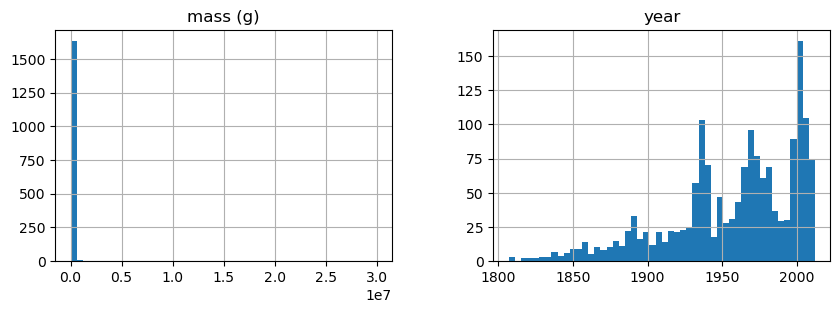

In [218]:
meteorite_data_c[['mass (g)','year']].hist(bins=50,figsize=(10,3))

The pattern of "years" shows clear maximums atoudn 1940 and 1970. This is curious -- either meteorite hunters got very interested in these years, or perhaps the data was most redily aggregated then. Still, it does not affect our analysis at this stage.

The median mass of the meteors found is 1.7 kg - that's big! But unsurprising, since it's more likely to find big ones. The largest one is 30,000 kg - that is remarkable. Below, I extract data on meteorites over 1,000 kg (1 ton). These are mostly famous meteorites; for example, the "Canyon Diablo" meteorite refers to a meteorite which fell 50,000 years ago in Arizona. This is the largest meteorite in the dataset, 30 tons. 

The only meteorite of this size marked as "fell" is the Norton County meteorite - the rest were "found". This meteorite has its own (Wikipedia) [https://en.wikipedia.org/wiki/Norton_County_(meteorite)] page:

>After a brilliant fireball and a loud noise, a very large shower of meteorites fell over a large area of Norton County (Kansas) and Furnas County (Nebraska) on February 18, 1948. 
>The main mass (about 1,070 kilograms (2,360 lb)) is the center piece of the meteorite display at the University of New Mexico in Albuquerque.

This is all very interesting, but it does not in the end affect our analysis that much -- except perhaps to tell us that we are most likely to find larger meteorites, not because they are more common, but because they are easier to find. 

In [219]:
meteorite_data_c[meteorite_data_c['mass (g)']>1000000].style


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties
707,Norton County,17922,Valid,Aubrite,1100000.000000,Fell,1948.000000,39.683330,-99.866670,"(39.68333, -99.86667)",17.000000,1252.000000
5201,Brenham,5136,Valid,"Pallasite, PMG-an",4300000.000000,Found,1882.000000,37.582500,-99.163610,"(37.5825, -99.16361)",17.000000,1238.000000
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.000000,Found,1891.000000,35.050000,-111.033330,"(35.05, -111.03333)",7.000000,986.000000
12637,Goose Lake,10947,Valid,"Iron, IAB-sLL",1169500.000000,Found,1938.000000,41.980000,-120.541670,"(41.98, -120.54167)",8.000000,76.000000
26349,Navajo,16926,Valid,"Iron, IIAB",2184000.000000,Found,1921.000000,35.333330,-109.500000,"(35.33333, -109.5)",7.000000,985.000000
30966,Odessa (iron),17985,Valid,"Iron, IAB-MG",1600000.000000,Found,1922.000000,31.716670,-102.400000,"(31.71667, -102.4)",23.000000,3169.000000
30977,Old Woman,18007,Valid,"Iron, IIAB",2753000.000000,Found,1976.000000,34.466670,-115.233330,"(34.46667, -115.23333)",8.000000,78.000000
35542,Quinn Canyon,22364,Valid,"Iron, IIIAB",1450000.000000,Found,1908.000000,38.083330,-115.533330,"(38.08333, -115.53333)",10.000000,2401.000000
38317,Willamette,24269,Valid,"Iron, IIIAB",15500000.000000,Found,1902.000000,45.366670,-122.583330,"(45.36667, -122.58333)",12.000000,2317.000000



##### Label the Meteorite Strikes by State
Now, label each meteorite strike by the state it appears in. This way, we will be able to analyze the spatial density, by state.

In [220]:
# This is the output, describing which are in which state.
statelist = []

# Loop over strikes.
for lon,lat in zip(meteorite_data_c.reclong, meteorite_data_c.reclat):
    pt = Point(lon, lat)
    
    # Loop over states.
    for number in range(len(states)):
        withinstate = pt.within(states['geometry'].iloc[number])
        if withinstate:
        
            statelist = statelist+ [states.iloc[number]['NAME']]
            
meteorite_data_c['State']  =statelist    

##### Explore in Folium
Let's review the data in the wonderful visualization libary called Folium.

In [287]:
import folium
from folium import plugins

usa_map = folium.Map(location=[38.828175, -98.5795],zoom_start=5.3,height=800)


In [288]:

# instantiate a feature group for the incidents in the dataframe
#meteorites = plugins.MarkerCluster().add_to(usa_map)
meteorites=folium.map.FeatureGroup()

# loop through the meteorites and add each to the feature group
labels = list(meteorite_data_c.name)

# I need lat/lon to map it, and will add labels about name, year, and mass.
for lat, lng, label,mass,year in zip(meteorite_data_c.reclat, meteorite_data_c.reclong,meteorite_data_c.name,meteorite_data_c['mass (g)'],meteorite_data_c.year):
    meteorites.add_child(
        folium.features.Marker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=1,
            popup=f"Name: {label}\nYear of Observation: {year}\nMass (g): {mass}\n"
        )
    )

# Add meteorites to map
usa_map.add_child(meteorites)

usa_map.save("data-outputs/us-meteor-strikes-map.html")
usa_map

While we don't learn anything detailed, we can see the largest preoponderance of meteorites found are in the Southern  USA - Kansas, Texas, Arizona, California -- all arid regions. This must simply correspond to unvegetated regions where meteorites would stand out.

### Step 5: Summarize Key Findings from the Exploration
Now that you have explored and cleaned the data, it is important to describe some of your key findings explicitly. 

I cleaned and explored this data, reviewing statistics and histograms. From this I can summarize some key observations about the data:

* The dataset includes meteorites which were found - and the year corresponds to when they were found, or when they were seen falling.
* The dataset is biased towards meteorites which are easier to find; large, and located in arid regions without heavy tree cover.
* There are unexplained peaks and valleys in the years of meteorite finds.

### Step 6: Revise Goal, if you Need to
Your exploration may have introduced limitations, or pointed out curious features to you, that may prompt you to revise your initial goal. 

In this case, my initial goal was to find the place in the USA I could most readily find meteorites. Nothing in my analysis thus far prompts me to need to revise that goal.

### Step 7: Define Analysis Objective
Now set with a set of clean data about which you understand very well, you are not ready to go beyond your vague goall and define your actual analysis parameters. Carefully specify in detail what you want to analyze, and your key questions to be answered. This should be detailed enough that you can readily complete an analysis, and should include any key limitations or assumptions.

For this analysis, I will use the following analysis objective:

>Meteorite landings should fall evenly across the surface of the Earth; every square mile of the continental USA should therefore have about the same number of fallen meteorites. But this density does not mean they are all equally easy to find; arid regions without tree cover, especially *bona fide* deserts, will present the best opportunity for finding meteorites, since there is little or no vegetative cover to obscure them. It should also be assumed that nowhere near all meteorites have been found, since so many fall constantly upon the Earth, and that even in regions where many have been taken, the total number is basically unchanged. 

>Therefore, with these assumptions, I will identify the areas of the continental USA where meteorites are most likely to be found as those with the *highest* density of meteorites which have been found. I will analyze this per US state.

With this analyze objective in hand, complete your work.

### Step 8: Complete Analysis
Now take whatever analysis steps you need to, to finish your work.

In this case study, we will evalute the relative spatial density of meteorite strikes per US State; the state with the highest density is where we should look for meteorites. 


In [247]:
# Count the meteorites using groupby into their respective states.
meteorite_counts = meteorite_data_c.groupby(by='State').count()
meteorite_counts['no of strikes']=meteorite_counts['id']
meteorite_counts = meteorite_counts[['no of strikes']].sort_values(by='no of strikes', ascending=False)

# Now join this with the area.
meteorite_counts=states[['NAME','ALAND']].set_index('NAME').join(meteorite_counts)

# ALl the NaN values which result correspond to states where there were no meteorite strikes. Replace with zero.
meteorite_counts.fillna(0, inplace=True)

# Before you merge anything, convert the ALAND field to square miles (it is currently in square meters)
meteorite_counts['ALAND'] = meteorite_counts['ALAND'] / (2.59*10**6) /1000
meteorite_counts.rename(columns={"ALAND":"Land Area (1000 sq mi)"},inplace=True)

# Finally, count our output.
meteorite_counts['strikes per 1,000 sq mi']= meteorite_counts['no of strikes'] / meteorite_counts['Land Area (1000 sq mi)']

meteorite_counts = meteorite_counts.sort_values(by='strikes per 1,000 sq mi',ascending=False)
meteorite_counts.iloc[0:10].style


,Land Area (1000 sq mi),no of strikes,"strikes per 1,000 sq mi"
NAME,,,
New Mexico,121.311315,220.000000,1.813516
Kansas,81.758820,140.000000,1.712353
California,155.793024,226.000000,1.450643
Texas,261.256051,300.000000,1.148299
Arizona,113.590174,120.000000,1.056429
Colorado,103.638182,87.000000,0.839459
Nevada,109.779732,92.000000,0.838042
Connecticut,4.842663,4.000000,0.825992
Kentucky,39.490151,26.000000,0.658392


### Step 9: State Conclusions
Now that your analysis is complete, you can state your conclusions, and throw in any interesting charts you can think of. 

Based on this analysis, New Mexico, Kansas, California, Texas, and Arizona, are the best states to look for meteorites. The commonality of finding meteorite strikes in arid regions is clear (even in California, most strikes are in the southern part of the state, if you inspect our map from before). This implies that finding an arid and empty part of one of these states will be your best bet to find meteorites.

I'll create a final plot using plotly to summarize the findings visually.

In [291]:
import plotly.express as px
 
fig=px.bar(meteorite_counts,y="strikes per 1,000 sq mi",title="Meteorites in the USA",
    labels={"no of strikes":"Number of Strikes","NAME":"State"},hover_data={"no of strikes":True},width=800,height=800)
 
fig.show()
#fig.write_html('nc-blog-examples/data-outputs/us-meteor-strikes.html', auto_open=False)